<a href="https://colab.research.google.com/github/Hiya-bit/Hiya-Nag-demo/blob/main/copy_of_stock_market_prediction_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"Stock Market Analysis with Python"

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Load the dataset

In [ ]:
file_path = '/content/NIFTY200 - Nifty200.csv'
df = pd.read_csv(file_path)


In [ ]:
# Convert dates and sort chronologicallly
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')
df = df.sort_values(by='Date')


In [ ]:
# Forward fill missing close prices if any
df['Close'] = df['Close'].fillna(method='ffill')


/tmp/ipython-input-3883851077.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Close'] = df['Close'].fillna(method='ffill')


In [ ]:
# Prepaire time series
series = df['Close'].values.reshape(-1, 1)

In [ ]:
# Normalise  (mean 0,std 1) to help the model train better
mean, std = series.mean(), series.std()
series = (series - mean) / std

In [ ]:
# Create sequences of past N days -> predict next day
timesteps = 30
def create_sequences(series, timesteps):
    X, y = [], []
    for i in range(len(series) - timesteps):
        X.append(series[i:i+timesteps])
        y.append(series[i+timesteps])
    return np.array(X), np.array(y)

X, y = create_sequences(series, timesteps)

In [ ]:
# Flatten sequences so MLP can use them
X = X.reshape(X.shape[0], -1)


Build the MLP model

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train the model

In [ ]:
history = model.fit(
    X, y,
    epochs=50,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 1.0427 - val_loss: 0.2267
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3108 - val_loss: 0.2075
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2591 - val_loss: 0.1324
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1873 - val_loss: 0.0870
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1554 - val_loss: 0.0835
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1356 - val_loss: 0.0864
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1254 - val_loss: 0.0743
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1167 - val_loss: 0.0658
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1000 - val_loss: 0.0630
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0957 - val_loss: 0.0620
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0940 - val_loss: 0.0590
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0884 - val_loss: 0.0585
E

Evaluate the performance


In [ ]:
y_pred = model.predict(X)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [ ]:
# Undo normalisation
y_pred = y_pred * std + mean
y_true = y * std + mean

In [ ]:
# Metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
accuracy = 100 - mape

print("\nModel Performance:")
print(f"MAE   : {mae:.2f} points")
print(f"RMSE  : {rmse:.2f} points")
print(f"R²    : {r2:.4f}")
print(f"MAPE  : {mape:.2f}%")
print(f"Accuracy ≈ {accuracy:.2f}%")



Model Performance:
MAE   : 67.09 points
RMSE  : 94.69 points
R²    : 0.9699
MAPE  : 0.50%
Accuracy ≈ 99.50%


Plot training history

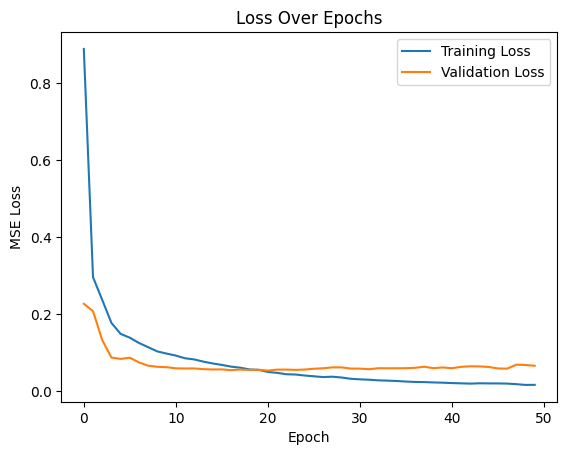

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

Visualize predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


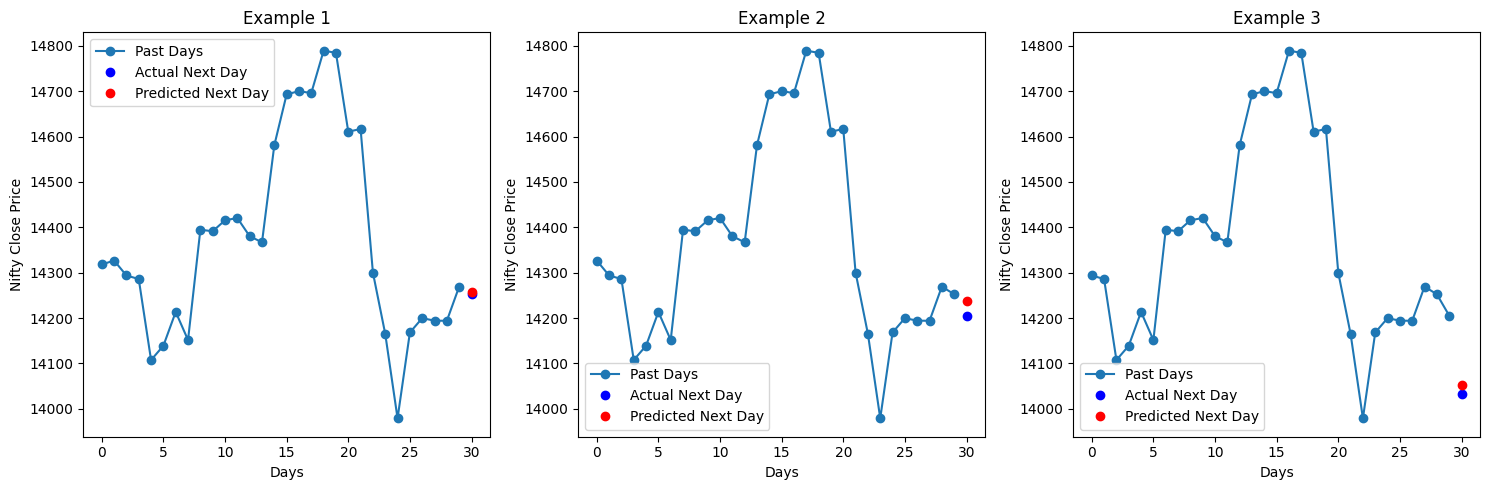

In [ ]:
num_examples = 3
examples_pred = model.predict(X[:num_examples]) * std + mean
examples_true = y[:num_examples] * std + mean
examples_input = X[:num_examples] * std + mean

plt.figure(figsize=(15, 5))
for i in range(num_examples):
    plt.subplot(1, num_examples, i + 1)
    past = examples_input[i].reshape(timesteps)
    plt.plot(range(timesteps), past, marker='o', label="Past Days")
    plt.plot(timesteps, examples_true[i], "bo", label="Actual Next Day")
    plt.plot(timesteps, examples_pred[i], "ro", label="Predicted Next Day")
    plt.title(f"Example {i+1}")
    plt.xlabel("Days")
    plt.ylabel("Nifty Close Price")
    plt.legend()
plt.tight_layout()
plt.show()